In [ ]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

####**Mohini Aggarwal**
#### Bike - Regression Model
#### Process through Import data -> Data cleaning -> Data Analysis -> Train/Test Split -> Regression model development -> Model Validation through accuracy check

#### 18 April 2022 

In [ ]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

# importing seaborn for statistical plots
import seaborn as sns

## Importing Data

In [ ]:
# reading the CSV file into pandas dataframe
bike_df = pd.read_csv("/content/day.csv")    

In [ ]:
# Check top few records to get a feel of the data
bike_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


##Data Cleaning and Analysis

In [ ]:
mpg_df=bike_df

In [ ]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['weathersit'] = mpg_df['weathersit'].replace({1:'Clear, Few clouds, Partly cloudy, Partly cloudy', 2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})
mpg_df['season'] = mpg_df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
mpg_df['yr'] = mpg_df['yr'].replace({0:2018, 1:2019})

In [ ]:
mpg_df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801


In [ ]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be from weathersit and season column values... with one hot coding
mpg_df = pd.get_dummies(mpg_df, columns=['weathersit','season'])

In [ ]:
mpg_df.head(2)

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,casual,registered,cnt,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",season_fall,season_spring,season_summer,season_winter
0,1,01-01-2018,2018,1,0,6,0,14.110847,18.18125,80.5833,...,331,654,985,0,0,1,0,1,0,0
1,2,02-01-2018,2018,1,0,0,0,14.902598,17.68695,69.6087,...,131,670,801,0,0,1,0,1,0,0


##Check for Null Values

In [ ]:
#Let us see if we can get those records with nan

mpg_df[mpg_df.isnull().any(axis=1)]
#No records with NAN

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,casual,registered,cnt,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",season_fall,season_spring,season_summer,season_winter


In [ ]:
#Lets analysze the distribution of the dependent (mpg) column
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,2018.500000,0.500343,2018.000000,2018.000000,2018.500000,2019.000000,2019.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021


In [ ]:
# Note:  HP column is missing the describe output. That indicates something is not right with that column

In [ ]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)

In [ ]:
#Let us see if we can get those records with nan

mpg_df[mpg_df.isnull().any(axis=1)]
mpg_df.head(2)

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,casual,registered,cnt,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",season_fall,season_spring,season_summer,season_winter
0,1,01-01-2018,2018,1,0,6,0,14.110847,18.18125,80.5833,...,331,654,985,0,0,1,0,1,0,0
1,2,02-01-2018,2018,1,0,0,0,14.902598,17.68695,69.6087,...,131,670,801,0,0,1,0,1,0,0


In [ ]:
#instead of dropping the rows, lets replace the missing values with median value. 
mpg_df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


instant                                                                                                365.500000
yr                                                                                                    2018.500000
mnth                                                                                                     7.000000
holiday                                                                                                  0.000000
weekday                                                                                                  3.000000
workingday                                                                                               1.000000
temp                                                                                                    20.465826
atemp                                                                                                   24.368225
hum                                                                                     

In [ ]:
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#mpg_df = mpg_df.fillna(mpg_df.median())
mpg_df.drop([ 'dteday'], axis=1, inplace=True)

In [ ]:
mpg_df.dtypes

instant                                                                                                 int64
yr                                                                                                      int64
mnth                                                                                                    int64
holiday                                                                                                 int64
weekday                                                                                                 int64
workingday                                                                                              int64
temp                                                                                                  float64
atemp                                                                                                 float64
hum                                                                                                   float64
windspeed 

In [ ]:
mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",season_fall,season_spring,season_summer,season_winter
0,1,2018,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,0,1,0,0
1,2,2018,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,0,1,0,0
2,3,2018,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,1,0,0
3,4,2018,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,1,0,0
4,5,2018,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019,12,0,4,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,0,1,0,1,0,0
726,727,2019,12,0,5,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,0,1,0,1,0,0
727,728,2019,12,0,6,0,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,0,1,0,1,0,0
728,729,2019,12,0,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796,1,0,0,0,1,0,0


##Pair Plot checks

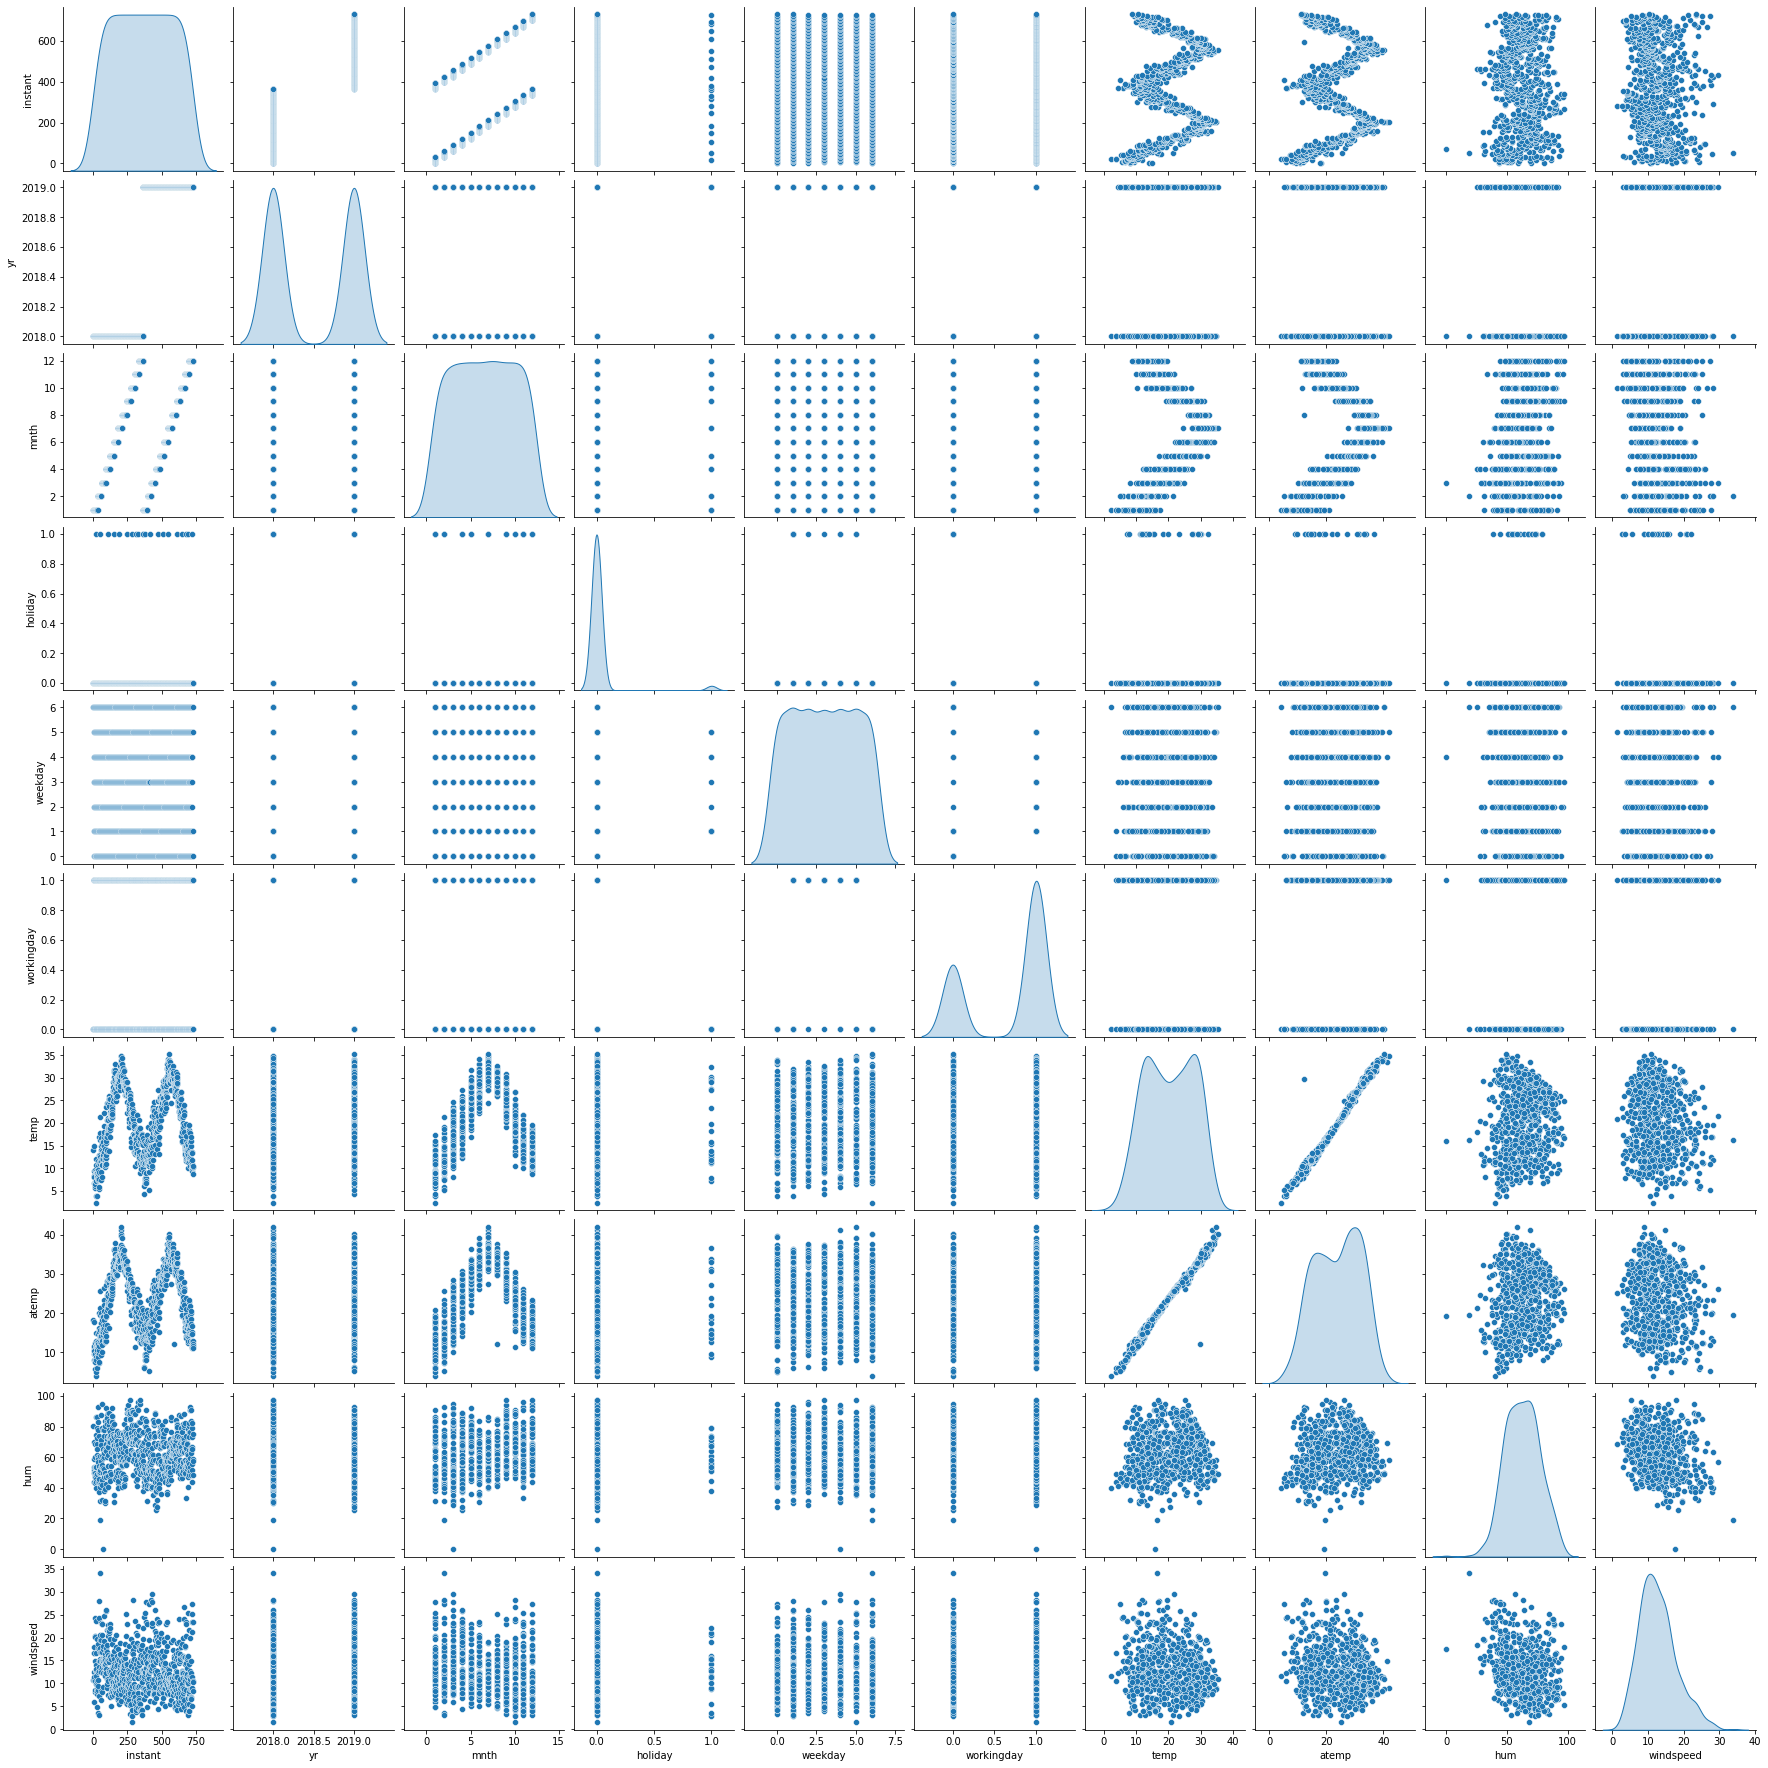

In [ ]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:, 0:10]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

## Model Development - 3 Iterations

##Iteration 1

In [ ]:
#The data distribution across various dimensions except 'Acc' do not look normal
#Close observation between 'mpg' and other attributes indicate the relationship is not really linear
#relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy
#How about 'mnth' vs 'yr' surprising to see a positive relation

In [ ]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('temp', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['temp']]


In [ ]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [ ]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for instant is 0.003638128891094435
The coefficient for yr is -1.5148803874974812
The coefficient for mnth is -0.10907042268193709
The coefficient for holiday is 0.4754821468288796
The coefficient for weekday is 0.021664054434330112
The coefficient for workingday is 0.21694308537347257
The coefficient for atemp is 0.8505562530137549
The coefficient for hum is 0.0028447152353688714
The coefficient for windspeed is 0.037039031155209505
The coefficient for casual is 0.00011474602355119213
The coefficient for registered is -1.292586090029129e-05
The coefficient for cnt is 0.00010182016668513927
The coefficient for weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy is -0.1034676896698307
The coefficient for weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds is 0.17597257515650094
The coefficient for weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist is -0.07250488548668343
The coefficient for season

In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3056.002940764568


In [ ]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9940357914031795

In [ ]:
mpg_df.corr().round(2)

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",season_fall,season_spring,season_summer,season_winter
instant,1.00,0.87,0.50,0.02,-0.00,-0.00,0.15,0.15,0.02,-0.11,0.28,0.66,0.63,0.02,-0.02,-0.01,0.10,-0.28,-0.16,0.34
yr,0.87,1.00,0.00,0.01,-0.01,-0.00,0.05,0.05,-0.11,-0.01,0.25,0.60,0.57,0.03,-0.07,-0.01,0.00,-0.00,-0.00,0.00
mnth,0.50,0.00,1.00,0.02,0.01,-0.00,0.22,0.23,0.22,-0.21,0.12,0.29,0.28,-0.02,0.08,-0.00,0.20,-0.57,-0.32,0.69
holiday,0.02,0.01,0.02,1.00,-0.10,-0.25,-0.03,-0.03,-0.02,0.01,0.05,-0.11,-0.07,0.03,-0.03,-0.02,-0.03,0.03,-0.02,0.02
weekday,-0.00,-0.01,0.01,-0.10,1.00,0.04,-0.00,-0.01,-0.05,0.01,0.06,0.06,0.07,-0.03,0.02,0.02,0.01,0.00,-0.00,-0.01
workingday,-0.00,-0.00,-0.00,-0.25,0.04,1.00,0.05,0.05,0.02,-0.02,-0.52,0.31,0.06,-0.06,0.03,0.05,0.02,-0.03,0.02,-0.00
temp,0.15,0.05,0.22,-0.03,-0.00,0.05,1.00,0.99,0.13,-0.16,0.54,0.54,0.63,0.11,-0.06,-0.10,0.68,-0.62,0.15,-0.23
atemp,0.15,0.05,0.23,-0.03,-0.01,0.05,0.99,1.00,0.14,-0.18,0.54,0.54,0.63,0.11,-0.06,-0.09,0.66,-0.62,0.16,-0.21
hum,0.02,-0.11,0.22,-0.02,-0.05,0.02,0.13,0.14,1.00,-0.25,-0.08,-0.09,-0.10,-0.57,0.27,0.49,0.02,-0.18,-0.00,0.16
windspeed,-0.11,-0.01,-0.21,0.01,0.01,-0.02,-0.16,-0.18,-0.25,1.00,-0.17,-0.22,-0.24,-0.00,0.12,-0.04,-0.14,0.18,0.10,-0.14


In [ ]:
#Dropping highly correlated variables
#drop atemp corr to temp
#drop registered, instant, casual - highly corr with yr, mth 
#drop season summer/spring/winter - keep season fall
#drop 'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' corre with others

In [ ]:
#Only keeping the columns required after correlations
mpg_df_2 = mpg_df[['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 'weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy', 'cnt', 'season_fall']]
mpg_df_2.head(2)

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy",cnt,season_fall
0,2018,1,0,6,0,14.110847,80.5833,10.749882,0,0,985,0
1,2018,1,0,0,0,14.902598,69.6087,16.652113,0,0,801,0


In [ ]:
mpg_df_2.corr().round(2)

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy",cnt,season_fall
yr,1.00,0.00,0.01,-0.01,-0.00,0.05,-0.11,-0.01,-0.07,0.03,0.57,0.00
mnth,0.00,1.00,0.02,0.01,-0.00,0.22,0.22,-0.21,0.08,-0.02,0.28,0.20
holiday,0.01,0.02,1.00,-0.10,-0.25,-0.03,-0.02,0.01,-0.03,0.03,-0.07,-0.03
weekday,-0.01,0.01,-0.10,1.00,0.04,-0.00,-0.05,0.01,0.02,-0.03,0.07,0.01
workingday,-0.00,-0.00,-0.25,0.04,1.00,0.05,0.02,-0.02,0.03,-0.06,0.06,0.02
temp,0.05,0.22,-0.03,-0.00,0.05,1.00,0.13,-0.16,-0.06,0.11,0.63,0.68
hum,-0.11,0.22,-0.02,-0.05,0.02,0.13,1.00,-0.25,0.27,-0.57,-0.10,0.02
windspeed,-0.01,-0.21,0.01,0.01,-0.02,-0.16,-0.25,1.00,0.12,-0.00,-0.24,-0.14
"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",-0.07,0.08,-0.03,0.02,0.03,-0.06,0.27,0.12,1.00,-0.23,-0.24,-0.03
"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy",0.03,-0.02,0.03,-0.03,-0.06,0.11,-0.57,-0.00,-0.23,1.00,0.25,0.11


In [94]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df_2.drop('cnt', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df_2[['cnt']]


In [95]:
from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

##Iteration 2 - Check for Correlations

In [96]:
#  Iteration -2 

#Since on many dimensions, the relationship is not really linear
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [97]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for yr is 2029.8319065937035
The coefficient for mnth is 96.09518941537583
The coefficient for holiday is -627.3618636687268
The coefficient for weekday is 74.0200138794473
The coefficient for workingday is -2.122601201093307
The coefficient for temp is 164.82056119541411
The coefficient for hum is -15.118302909221214
The coefficient for windspeed is -47.24900305055431
The coefficient for weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds is -1557.666883497258
The coefficient for weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy is 285.89908370956175
The coefficient for season_fall is -686.5490323143481


In [98]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -4095272.1977307736


In [99]:
regression_model.score(X_test, y_test)

0.7925948315015837

##Iteration 3 - to account for non-linear relationships. Include quadratic equation 

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)

X_test_ = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train_, y_train)

y_pred = poly_clf.predict(X_test_)

#print(y_pred)

print(poly_clf.score(X_test_, y_test))


0.7933959881205921


In [101]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7933959881205921

In [102]:
print(X.shape)
print(X_train_.shape)
poly

(730, 11)
(511, 67)


PolynomialFeatures(interaction_only=True)

##Regression - Polynomial model results are better compared to linear regression.

In [103]:
# polynomial function gives a better result.  
# 5 Factor model gives 45% accuracy which is lesser accurate compared to 7-8 factors.

In [104]:
# Coefficient fromm the model above tells 5 most important Factors: 
# 1. Yr/Month
# 2. Season_Fall
# 3. weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4. weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy
# 5. workingday
